
# GoogleMap

Definitely, Google map is one of popular web applications nowaday and better than Apple map.

- [Howto](#Howto): basic requirement of using Goole Map App
- [Template](#Template): A simple demo of app using Google Map
- [Mark the Position](#MarkThePosition): anchor the position
- [Marker](#Marker)
- [Demo](#MarkerDraggable); Demo of Marker Draggable
- [How Far from Here](#DistanceMeasurement) Distance Measurement
- [Area Estimation](#AreaEstimation) Estimate the Area of polygon
- [Make Note](#Make-a-note-via-Google-Map) List of Locations
- [Map Animating](#Marauders-Maps) Create a Marauders-Maps

## Howto

To use the Google Map service, there are some standard procedures to do as folows:

1. **Use javascript library of the Google Map API's**

```html
 <script type="text/javascript"
     src="http://maps.googleapis.com/maps/api/js?sensor=true&language=tw&v=3" >
 </script>

```
   option "sensor=true": use mobile device

2. **Initialize the service**

```javascript
        function initialize() {
           // Options of Map
           // center position, rate of magnitude, and type of maps given  
           var mapOptions = {
               center: new google.maps.LatLng(25.034264,121.389395),
               zoom: 16,
               mapTypeId: google.maps.MapTypeId.ROADP
           };
           // location at which the map is displayed
           var map = new google.maps.Map(document.getElementById("map_canvas"),
               mapOptions);
        }
```        
3. **Run the  code while loaded**  

```html
        <body onload="initialize()">
        <div id="map_canvas" style="width: 600px;height: 400px;" />
```        

Note 
---
Here, type of maps is ROADP; other formats are

- MapTypeId.SATELLITE
- MapTypeId.HYBRID 
- MapTypeId.TERRAIN 
- MapTypeId.ROADMAP, defaulted.

## Template 
A simple demo:

```html
<html>
<head>
<script type="text/javascript"
      src="http://maps.googleapis.com/maps/api/js?sensor=true&language=tw&v=3" >
</script>

<script type="text/javascript">
      function initialize() {
        var mapOptions = {
          center: new google.maps.LatLng(25.034264,121.389395),
          zoom: 16,
          mapTypeId: google.maps.MapTypeId.ROADP
        };
        var map = new google.maps.Map(document.getElementById("map"),
            mapOptions);
      }

</script>
</head>
<body onload="initialize()">
     <div id="map" style="width: 600px;height: 400px;"/>
</body>
</html>
```

## CSSModification
Except given the option of size of "map_canvas", we can aslo use CSS to set the size of Canvas of Map

```html
<style>
    html, body, #map {
        height: 100%;
        width: 100%;
        margin: 0px;
        padding: 0px;
    }
</style>
```
The app size should be resized according to user's necessary.

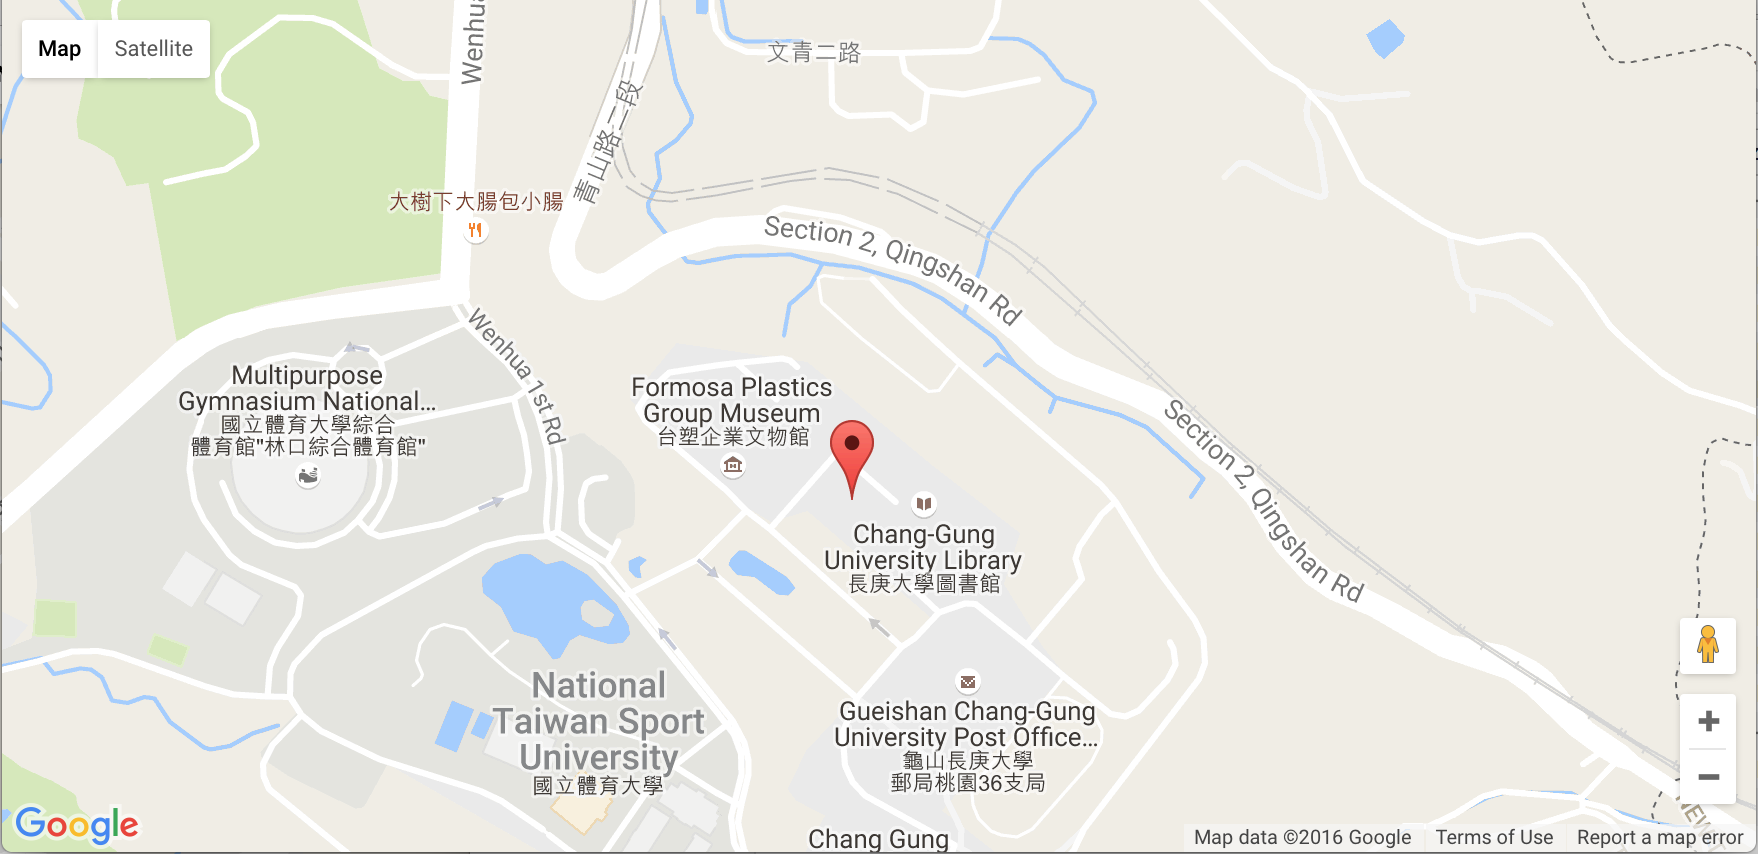

In [8]:
from IPython.display import Image
Image("imgs/gmap-1.png")

## MarkThePosition

1. define the the latitude and lonitude of given position:
```javascript        
        var CGU_latlng = new google.maps.LatLng(25.034264,121.389395);
``` 
2. create marker:
```javascript 
        var marker = new google.maps.Marker({
            position: CGU_latlng,
            map: gmap,
            title:"Chang-gung University"
        });
```        

## Marker

```html
<script type="text/javascript">
    window.onload = function () {
      // initialize Google Map
      var latlng = new google.maps.LatLng(25.034264,121.389395);
      var mapOptions = {
          zoom:12, 
          center:latlng, 
          mapTypeId: google.maps.MapTypeId.ROADMAP
      };
      var gmap = new google.maps.Map(document.getElementById("map_canvas"), mapOptions);
      // Show Mark
      var CGU_latlng = new google.maps.LatLng(25.034264,121.389395);
      var marker = new google.maps.Marker({
          position: CGU_latlng, 
          map: gmap, 
          title:"Chang-gung University"
      });
    };
</script>
<body>
  <div id="map_canvas" style="width: 600px;height: 400px;" />
</body>
```

## MarkerDraggable

1. Show the marker at defaulted position while loading;
2. Use mouse to drag the marker; 
3. show the **new** Latitude and longitude of the position at which the mark was placed.

## Basic HTML

Create a block to display the lat-long of poisition:
```html
    <div id="map_canvas" style="width: 600px;height: 480px;"></div><br />
    <label for="latitude">Latitude:</label>
    <input id="latitude" type="text" value="" />
    <label for="longitude">Longitude:</label>
    <input id="longitude" type="text" value="" />
```
This should create the input columns as follows:

  <div id="map_canvas" style="width: 600px;height: 0px;"></div>
  <br />
  &nbsp;&nbsp;&nbsp;&nbsp;<code>""" Google Map Here """</code>
  <p /> 
  <p />
  <br>
  <label for="latitude">Latitude:</label>
  <input id="latitude" type="text" value="" />
  <label for="longitude">Longitude:</label>
  <input id="longitude" type="text" value="" />

## JavaScript part

<font color="brown">    "HTML PART" Here....</font>
```javascript    
    <script type="text/javascript">
      var myCoordsLenght = 6;
      var defaultLat = 25.034264;
      var defaultLng = 121.389395;

      function initialize() {
         var mapOptions = {
             ...
         };
         var map = new google.maps.Map(document.getElementById("map_canvas"),mapOptions);
      
         // creates a draggable marker to the given coords    
         var myMarker = new google.maps.Marker({
             ...
              draggable: true
         }); 

         google.maps.event.addListener(myMarker, 'dragend', function(evt){
	         document.getElementById('latitude').value = evt.latLng.lat();
	         document.getElementById('longitude').value = evt.latLng.lng().toFixed(myCoordsLenght);
         });

         // centers the map on markers coords
         map.setCenter(myMarker.position);

         // adds the marker on the map
         myMarker.setMap(map);
      }

      google.maps.event.addDomListener(window, 'load', initialize); 
    </script>
```    

## Completed Codes

```html
<html lang="en">
<head>
   <meta charset="utf-8" />
   <script type="text/javascript" src="http://maps.google.com/maps/api/js?sensor=true"></script>
</head>
<body>
    <div id="map_canvas" style="width: 600px;height: 400px;"></div><br />
    <label for="latitude">Latitude:</label>
    <input id="latitude" type="text" value="" />
    <label for="longitude">Longitude:</label>
    <input id="longitude" type="text" value="" />
<script type="text/javascript">
  var myCoordsLenght = 6;
  var defaultLat = 25.034264;
  var defaultLng = 121.389395;

  function initialize() {
     var mapOptions = {
         center: new google.maps.LatLng(defaultLat,defaultLng),
         zoom: 16,
         mapTypeId: google.maps.MapTypeId.ROADP
     };
     var map = new google.maps.Map(document.getElementById("map_canvas"),mapOptions);

     var myMarker = new google.maps.Marker({
         position: new google.maps.LatLng(defaultLat, defaultLng),
         draggable: true
     }); 

     google.maps.event.addListener(myMarker, 'dragend', function(evt){
         document.getElementById('latitude').value = evt.latLng.lat();
         document.getElementById('longitude').value = evt.latLng.lng().toFixed(myCoordsLenght);
     });

     map.setCenter(myMarker.position);
     myMarker.setMap(map);
  }
  google.maps.event.addDomListener(window, 'load', initialize); 
</script>
</body></html>
```

 

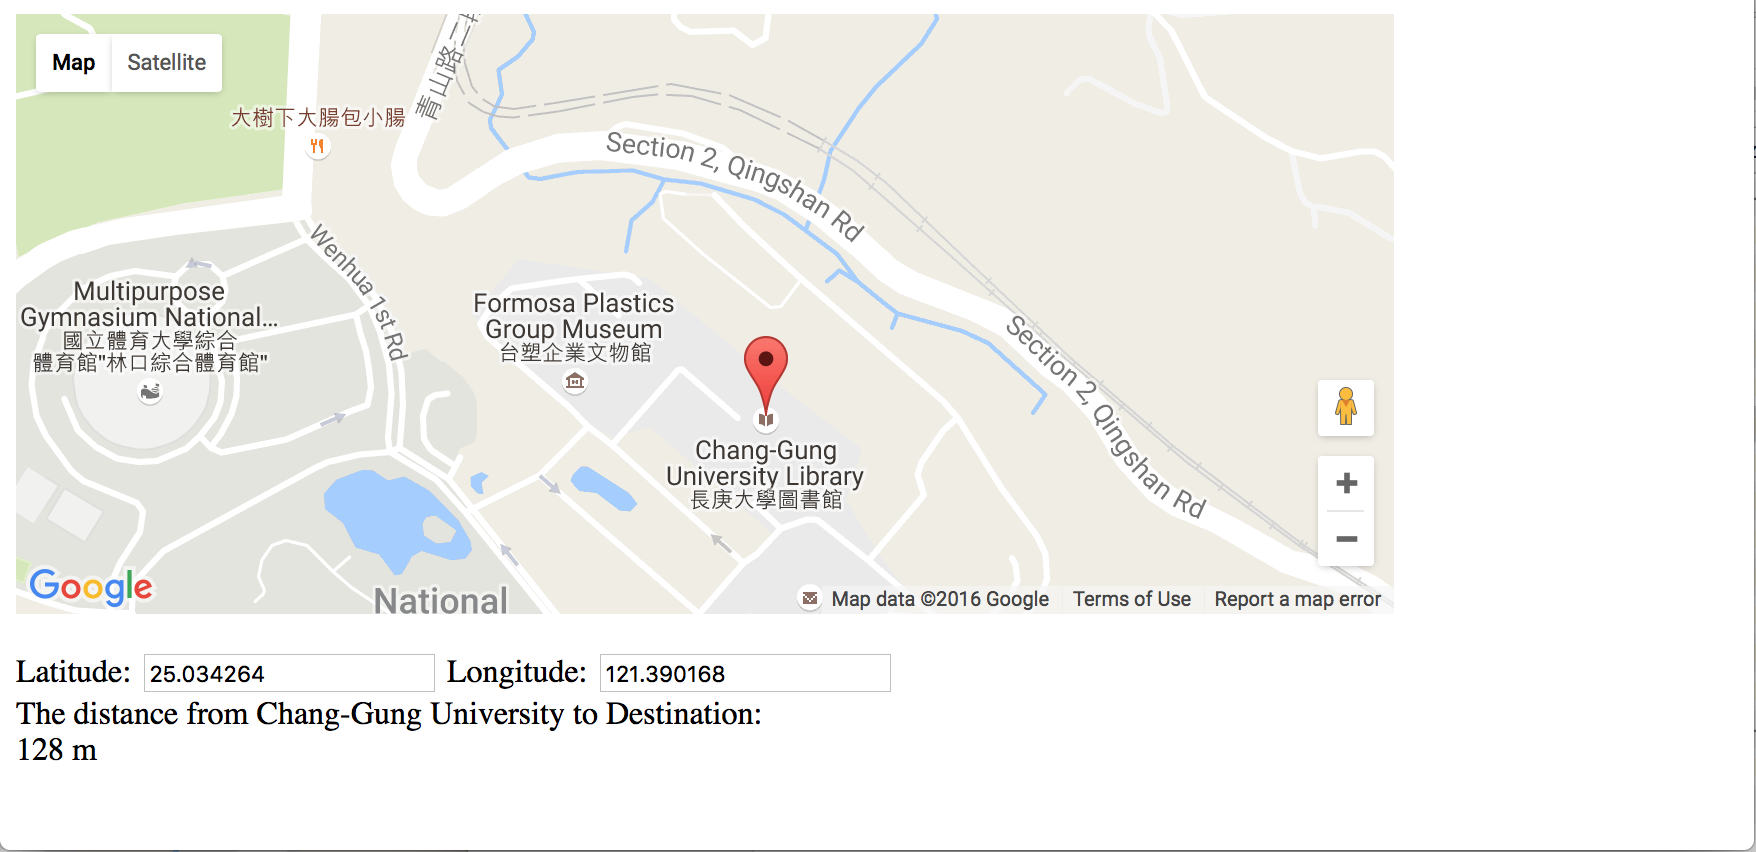

In [9]:
Image("imgs/gmap-2.png")

Application
---
- Make Survey (get data in csv format)
- make map of survey data (by scratch or by Python)

In [6]:
IFrame(src="ntufolium.html", width="800px", height="500px" )

Note
---
**1.** How to get rid of app title bar?

So small to display the unnecessary info. Modify the default setting of Theme in <font color="brown"> AndroidManifest.xml</font>:
<img src="imgs/Themebefore.png" width=90% />
<img src="imgs/Themeafter.png" width=90% />
The result
---
<img src="imgs/NoTitleTheme.png" width=90% />


## DistanceMeasurement
 
[Codes, GPSCoord-2.html](codes/GPSCoord-2.html)

1. To access the function of distance measurement requires <font color="brown">geometry</font> libarary:
 
```html
        <head>
	      <script type="text/javascript"   
	         src="http://maps.google.com/maps/api/js?sensor=true&v=3&libraries=geometry"></script>
        </head>
```  
2. where the measurement is placed:
```html        
        <label>	
	        The distance from Chang-Gung University to Destination: <div id="distanceAB"></div>
	    <label>
```
3. calculate the distance, set new coordinates, then measure by **"google.maps.geometry.spherical.computeDistanceBetween()"**:

```javascript
        google.maps.event.addListener(myMarker, 'dragend', function(evt){  
           var newLat=evt.latLng.lat();
           var newLng=evt.latLng.lng().toFixed(myCoordsLenght);
	       document.getElementById('latitude').value = newLat;
	       document.getElementById('longitude').value = newLng;
	       var loc2 = new google.maps.LatLng(newLat, newLng);
	       document.getElementById('distanceAB').innerHTML =
	            Math.round(google.maps.geometry.spherical.computeDistanceBetween (loc1, loc2))+'  m';
        });
```        

Sketch
---
```html
                 HTML
            defaulted Lat/Lng                                     JavaScript
     
     Latitude: (defaultLat)  Longitude: (defaultLng)    google.maps.event.addListener(,,function(evt))
                   |                        |                      :
                   |                        |                      :    
                   ▼                       ▼                      :
                 newLat                   newLng                   :    waiting for position changed
                   ▲                        ▲                      :
                   |                        |                      :
            evt.latLng.lat()  ◄-..  evt.latLng.lng() ◄------------ ┤    If dragged
                                                                   :
                                                                   :
           <div id="distanceAB">     </div>                        :
                                  ▲                                :          
                                  └ -------------------------------┘ 
                   google.maps.geometry.spherical.computeDistanceBetween(loc1,loc2)
```

<h3>Make a note via Google Map</h3>

[Codes, GPSCoord-3.html](GPSCoord-3.html)

Create an arraay of latitude/longitude list for which we are interested. Move the marker to the place which we select from the HTML options.

- <big>create the html options</big>
<br>
```html
       <select id="PosMenu">
          <option value="0">Library</option>
          <option value="1">National Sport University</option>
          <option value="2">Post Office</option>
       </select>
       <div id="distanceAC">__</div>"
```

Result:
<br>
<select id="PosMenu">
    <option value="0">Library</option>
    <option value="1">National Sport University</option>
    <option value="2">Post Office</option>
</select>
<div id="distanceAC">__</div>

- <big>Array in Javascript</big>
<br>
```javascript
    var loctoLib=[[25.035236, 121.389524],[25.034225,121.390168]];
    var loctoPO=[[25.035236, 121.389524],[25.032514, 121.39066]];
    var loctoNSU=[[25.035236,121.389524],[25.034750,121.389245],[25.033991,121.388494],[25.034147,121.388237], [25.033350,121.387013],[25.032125,121.388022],[25.0317170,121.387464],
             [25.0319892,121.386692]];
```    

- <big>show the marker at the place on the map while option  was selected (i.e. `[Element]`.<font color="brown">onchange</font>):</big>
<br>

```javascript
    document.getElementById('PosMenu').onchange = function() {
       var index = this.value; 

       var loc2 = new google.maps.LatLng(loc[index][0], loc[index][1]);
       document.getElementById('distanceAC').innerHTML =
          Math.round(google.maps.geometry.spherical.computeDistanceBetween (loc1, loc2))+'  m';
       var newMarker = new google.maps.Marker({
          position: new google.maps.LatLng(loc[index][0], loc[index][1]),
          draggable: myMarkerIsDraggable
       });

       // centers the map on markers coords
       var mapOptions = {
          ...
       };

       var map = new google.maps.Map(document.getElementById("map_canvas"),mapOptions)

       google.maps.event.addListener(newMarker, 'dragend', function(evt){  
          var newLat=evt.latLng.lat();
          var newLng=evt.latLng.lng().toFixed(myCoordsLenght);
	      document.getElementById('latitude').value = newLat;
	      document.getElementById('longitude').value = newLng;
	      var loc2 = new google.maps.LatLng(newLat, newLng);
	      document.getElementById('distanceAB').innerHTML =
	      Math.round(google.maps.geometry.spherical.computeDistanceBetween (loc1, loc2))+'  m';
        });

        map.setCenter(newMarker.position);
        newMarker.setMap(map)
     }
```     

- create the chosen tracjectory
```javascript
       if (index==0) {
          var coord =[];
          for (i = 0; i < loctoLib.length; i++) { 
               coord.push(new google.maps.LatLng(loctoLib[i][0], loctoLib[i][1]));
          }
       } else if (index==1) {
          var coord =[];
          for (i = 0; i < loctoNSU.length; i++) { 
              coord.push(new google.maps.LatLng(loctoNSU[i][0], loctoNSU[i][1]));
          }
       } else {
         var coord =[];
         for (i = 0; i < loctoPO.length; i++) { 
             coord.push(new google.maps.LatLng(loctoPO[i][0], loctoPO[i][1]));
         }    
       }
```       

## PositionMarker

```html
<script type="text/javascript">
window.onload = function () {
    var latlng = new google.maps.LatLng(25.034264,121.389395);
    var mapOptions = {
        zoom:12, 
        center:latlng, 
        mapTypeId: google.maps.MapTypeId.ROADMAP
    };
    var gmap = new google.maps.Map($("map_canvas"), mapOptions);

    var Coordinates = [
        new google.maps.LatLng(25.034264,121.389395),
        new google.maps.LatLng(25.034264,121.391395),
        new google.maps.LatLng(25.036264,121.391395),
     ];
     var flightPath = new google.maps.Polyline({
        path: Coordinates,
        strokeColor: "#FF0000",
        strokeOpacity: 1.0,
        strokeWeight: 3,
        map: gmap
     });
 };
</script>
</head><body>
<div id="map_canvas" />
```


- Make the trajectory:
```javascript
    var TrajPath= new google.maps.Polyline({
         path: coord,
         geodesic: true,
         strokeColor: '#FF0000',
         strokeOpacity: 0.8,
         strokeWeight: 2
     });
     TrajPath.setMap(map);
```     

Complete Code
---

Show the distance of destiny positions

```html
<html lang="en">
<head>
	<meta charset="utf-8" />
	<meta name="viewport" content="width=device-width" />
	<title></title>
	<script type="text/javascript"   
	   src="http://maps.google.com/maps/api/js?sensor=true&v=3&libraries=geometry"></script>
		
<style type="text/css">
    body { 
       margin: 10; 
       padding: 10
     }
    #map_canvas { 
        position: absolute;
        width: 60%; 
        height: 60%; 
        left:20%;
        right:20%;
        top:30%;
        overflow: auto
     }
</style>     
</head>

<body>

	<div id="map_canvas"></div>
	<br />
	<label for="latitude">Latitude:</label>
	<input id="latitude" type="text" value="" />
	<label for="longitude">Longitude:</label>bottom
	<input id="longitude" type="text" value="" />
	
	<br><label>	
	The distance from Chang-Gung University to Destination: <div id="distanceAB"></div>
	<label>
	<br>	
	  The distance from Chang-Gung University to Destination
	  <select id="PosMenu">
              <option value="0">library</option>
              <option value="1">NSU</option>
              <option value="2">PO</option>
          </select>
	   <div id="distanceAC"></div>
	
<script type="text/javascript">
```

```javascript
  var myZoom = 16;
  var myMarkerIsDraggable = true;
  var myCoordsLenght = 6;
  var defaultLat = 25.035255529260443;
  var defaultLng = 121.389524;
  var loc1 = new google.maps.LatLng(25.035255529260443, 121.389524);
  var loc = [[25.034225,121.390168],[25.032047,121.386692],[25.032514, 121.390661]];

  function initialize() {
    var mapOptions = {
          center: new google.maps.LatLng(defaultLat,defaultLng),
          zoom: myZoom,
          mapTypeId: google.maps.MapTypeId.ROADP
    };
    var map = new google.maps.Map(document.getElementById("map_canvas"),mapOptions);
    // creates a draggable marker to the given coords   -3.118-3.118
    
    var myMarker = new google.maps.Marker({
    position: new google.maps.LatLng(defaultLat, defaultLng),
    draggable: myMarkerIsDraggable
    }); 


    google.maps.event.addListener(myMarker, 'dragend', function(evt){  
        var newLat=evt.latLng.lat();
        var newLng=evt.latLng.lng().toFixed(myCoordsLenght);
	document.getElementById('latitude').value = newLat;
	document.getElementById('longitude').value = newLng;
	var loc2 = new google.maps.LatLng(newLat, newLng);
	document.getElementById('distanceAB').innerHTML =
	   Math.round(google.maps.geometry.spherical.computeDistanceBetween (loc1, loc2))+'  m';

    });
    
    // centers the map on markers coords
    map.setCenter(myMarker.position);

    // adds the marker on the map
    myMarker.setMap(map);
  }

  google.maps.event.addDomListener(window, 'load', initialize);

  document.getElementById('PosMenu').onchange = function() {
    var index = this.value; // array indices start at 0
    //alert(loc[index][0]);
    var loc2 = new google.maps.LatLng(loc[index][0], loc[index][1]);
    document.getElementById('distanceAC').innerHTML =
    Math.round(google.maps.geometry.spherical.computeDistanceBetween (loc1, loc2))+'  m';
    var newMarker = new google.maps.Marker({
        position: new google.maps.LatLng(loc[index][0], loc[index][1]),
        draggable: myMarkerIsDraggable
    });

    // centers the map on markers coords
    var mapOptions = {
          center: new google.maps.LatLng(defaultLat,defaultLng),
          zoom: myZoom,
          mapTypeId: google.maps.MapTypeId.ROADP
    };

    var map = new google.maps.Map(document.getElementById("map_canvas"),mapOptions)

    google.maps.event.addListener(newMarker, 'dragend', function(evt){  
        var newLat=evt.latLng.lat();
        var newLng=evt.latLng.lng().toFixed(myCoordsLenght);
	    document.getElementById('latitude').value = newLat;
	    document.getElementById('longitude').value = newLng;
	    var loc2 = new google.maps.LatLng(newLat, newLng);
	    document.getElementById('distanceAB').innerHTML =
	      Math.round(google.maps.geometry.spherical.computeDistanceBetween (loc1, loc2))+'  m';
    });

    map.setCenter(newMarker.position);

    // adds the marker on the map
    newMarker.setMap(map)
  }
```
```hrml
</script>

</body>
</html>
```

Result
---
<img src="imgs/gmap-4.png" />

## AreaEstimation

The steps to solve the last practice, mark a region: <br>

1. Find the the (latitude, longitude)'s of defaulted building;
2. make a closed polygon formed by set of given points, found by above;
3. calculate the area of polygon above.

## code1-1

```html
<head>
     <meta charset="utf-8" />
     <title>Laditude and Longitude</title>
     <script type="text/javascript" src="http://maps.google.com/maps/api/js?sensor=true" >
     </script> 
 </head>
```


## code1-2

```html
<body>
   <div id="map_canvas" style="width: 600px;height: 400px;"></div><br>
   <label for="latitude">Latitude:</label>
   <input id="latitude" type="text" value="" />
   <label for="longitude">Longitude:</label>
   <input id="longitude" type="text" value="" />
<script type="text/javascript">
  var myZoom = 16;
  var myMarkerIsDraggable = true;
  var myCoordsLenght = 6;
  var defaultLat = 25.034264;
  var defaultLng = 121.389395;

  function initialize() {
    var mapOptions = {
          center: new google.maps.LatLng(defaultLat,defaultLng),
          zoom: myZoom,
          mapTypeId: google.maps.MapTypeId.ROADP
    };
    var map = new google.maps.Map(document.getElementById("map_canvas"),mapOptions);
    
    // creates a draggable marker to the given coords      
    var myMarker = new google.maps.Marker({
    position: new google.maps.LatLng(defaultLat, defaultLng),
    draggable: myMarkerIsDraggable
    }); 

    google.maps.event.addListener(myMarker, 'dragend', function(evt){
    document.getElementById('latitude').value = evt.latLng.lat().toFixed(myCoordsLenght);
    document.getElementById('longitude').value = evt.latLng.lng().toFixed(myCoordsLenght);
    });

    // centers the map on markers coords
    map.setCenter(myMarker.position);

    // adds the marker on the map
    myMarker.setMap(map);
  }

  google.maps.event.addDomListener(window, 'load', initialize); 
</script>
</body>
```

## Code 2-1

```javascript
<script>
  // This example creates a simple polygon representing the library building in CGU .
  var myZoom = 16;
  //var myMarkerIsDraggable = true;
  //var myCoordsLenght = 6;
  var defaultLat = 25.034264;
  var defaultLng = 121.389395;

  function initialize() {
    var mapOptions = {
          center: new google.maps.LatLng(defaultLat,defaultLng),
          zoom: myZoom,
          mapTypeId: google.maps.MapTypeId.TERRAIN
    };
    var map = new google.maps.Map(document.getElementById('map_canvas'),mapOptions);

    // Define the LatLng coordinates for the polygon's path.
    var PolygonCoords = [
        new google.maps.LatLng(25.034200,121.390527),
        new google.maps.LatLng(25.034020,121.390790),
        new google.maps.LatLng(25.033413,121.390237),
        new google.maps.LatLng(25.033612,121.390001),
        new google.maps.LatLng(25.034200,121.390527)
    ];
    // Construct thepolygon.
    var myPolygon;
    myPolygon= new google.maps.Polygon({
      paths: PolygonCoords,
      strokeColor: '#FF0000',
      strokeOpacity: 0.8,
      strokeWeight: 2,
      fillColor: '#FF0000',
      fillOpacity: 0.35
    });
    myPolygon.setMap(map);
  }
  google.maps.event.addDomListener(window, 'load', initialize);
  </script>
```

## Code2-2

```html
<body>
    <div id="map_canvas" style="width: 600px;height: 400px;"></div>
</body>
```


## Code3-1

```javascript
<script type="text/javascript" 
    src="https://maps.googleapis.com/maps/api/js?libraries=geometry&sensor=false" > 
</script>
<script type="text/javascript">
    var myZoom = 16;
    var myMarkerIsDraggable = true;
    var myCoordsLenght = 6;
    var defaultLat = 25.034264;
    var defaultLng = 121.389395;
    var map;
    function initialize(){
        var mapOptions = {
          center: new google.maps.LatLng(defaultLat,defaultLng),
          zoom: myZoom,
          mapTypeId: google.maps.MapTypeId.ROADP
        };
        var map = new google.maps.Map(document.getElementById("map_canvas"),mapOptions);     
    }
    google.maps.event.addDomListener(window, 'load', initialize);
</script>
```

## Code3-2

```javascript
<script>
   function test(){
        var arr = new Array()
        arr.push('25.034200,121.390527');
        arr.push('25.034020,121.390790');
        arr.push('25.033413,121.390237');
        arr.push('25.033612,121.390001');
        arr.push('25.034200,121.390527');
        AreaComp(arr);
   }
   function AreaComp(CoordArr){
      var a = new Array();

      for(var i=0; i<CoordArr.length; i++){
          var point = CoordArr[i].split(",");
          a[i] = new google.maps.LatLng(point[0],point[1]);
      }

      mypolygon = new google.maps.Polygon({
        paths: a,
        strokeColor: "#22B14C",
        strokeOpacity: 0.8,
        strokeWeight: 2,
        fillColor: "#22B14C",   
        fillOpacity: 0.35   
     })  

     mypolygon.setMap(map);//until here is ok 
     var z =  google.maps.geometry.spherical.computeArea(mypolygon.getPath());
     alert(z); //this is not working
   }
</script>
```

## Code3-3

```html
<body onload="test();">
    <div id="map_canvas" style="width: 600px;height: 400px;"></div>
</body>

```

# Practice

Make a squre around your dormitory and estimate the base area of the building.


Marauders Maps
---

The Marauder's Map is a magical document that reveals all of Hogwarts School of Witchcraft and Wizardry.

Animated Map
---

To create the animated trajetory of object, we make some changes from the last example, make notes.

<img src="imgs/marauders.png" />

**1.** First for 

```html
<!doctype html>
<html lang="en">
<head>
	...	
<style type="text/css">
    body { 
       margin: 10; 
       padding: 10
     }
    #map_canvas { 
        position: absolute;
        width: 60%; 
        height: 60%; 
        left:20%;
        right:20%;
        top:30%;
        overflow: auto
    }
    div.vertical-text {
        -webkit-transform:rotate(90deg);
	    -moz-transform:rotate(90deg);
	    -o-transform: rotate(90deg);
	    transform: rotate(90deg);
        transform-origin: left top 0;
        white-space:nowrap;
	    display:block;
	    bottom:0;
	    width:20px;
	    height:20px;
	    font-family: ‘Trebuchet MS’, Helvetica, sans-serif;
	    font-size:1.em;
	    font-weight:normal;
	    text-shadow: 0px 0px 1px #333;
    }
</style>     
</head>
...
```
Here the syntax for CSS
- `tag {...}`: function on HTML's `<tag>`;
- `#name {...}`: function on HTML's tag with `id/name="name"`;
- `div.vertical-text {...}`: function on HTML's tag, `<div class='vertical-text`>`;


**2.** create a moving object, <font color="#393"> small circle <b><big><big>○</big><big></b></font>, which runs on the chosen trajectory:
```javascript
<script type="text/javascript">
...
   var lineSymbol = {
       path: google.maps.SymbolPath.CIRCLE,
       scale: 8,
       strokeColor: '#393'
   };
...
   var myMarker = new google.maps.Marker({
    ...
       animation: google.maps.Animation.DROP
   });
   google.maps.event.addListener(myMarker, 'click', toggleBounce);
    
   function toggleBounce() {
       if (myMarker.getAnimation() != null) {
          myMarker.setAnimation(null);
       } else {
        myMarker.setAnimation(google.maps.Animation.BOUNCE);
       }
    };    
  
```
- Marker can be animated by two ways:
  - DROP: jump to the end;
  - BOUNCE: move while animation is *null*.
- While initialized, set Marker is DROP,
- set Listener on mouse `click` event; if `on`, continuously `jump`ing while animation becomes null. 

**3.** Determine the position of moving marker and refresh map; the respose requires a new function, `animateCircle()`, to refresh the marker position every **20** milli-second: 
```javascript
<script type="text/javascript">
... 
   var TrajPath= new google.maps.Polyline({
      ...
      icons: [{
         icon: lineSymbol,
         offset: '100%'
      }],
      ...
      map: map
    });
   //TrajPath.setMap(map);
   animateCircle();
   map.setCenter(newMarker.position);

   // adds the marker on the map
   newMarker.setMap(map);
  
   function animateCircle() {
     var count = 0;
     window.setInterval(function() {
        count = (count + 1) % 200;

        var icons = TrajPath.get('icons');
        icons[0].offset = (count / 2) + '%';
        TrajPath.set('icons', icons);
     }, 20);
   };

}
</script>

```

In [1]:
!jupyter nbconvert --to html GoogleMap.ipynb

[NbConvertApp] Converting notebook GoogleMap.ipynb to html
[NbConvertApp] Writing 1096979 bytes to GoogleMap.html
